In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("anemia.csv")

In [4]:
df.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [7]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


Result count

Text(0.5, 1.0, 'Result count')

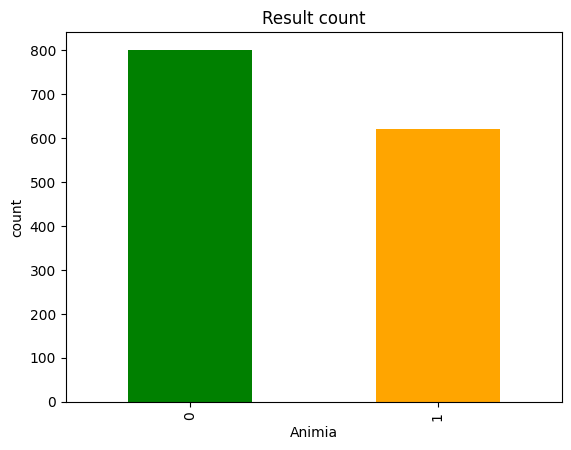

In [8]:
output=df['Result'].value_counts()
output.plot(kind='bar',color=["green","orange"])
plt.xlabel("Animia")
plt.ylabel("count")
plt.title("Result count")

Gender count

Text(0.5, 1.0, 'Gender count')

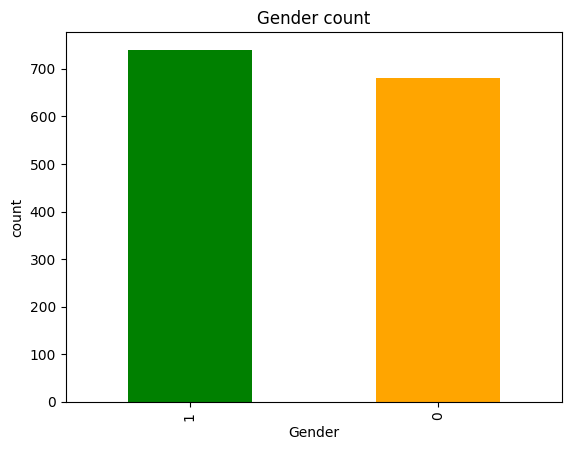

In [9]:
output=df['Gender'].value_counts()
output.plot(kind='bar',color=["green","orange"])
plt.xlabel("Gender")
plt.ylabel("count")
plt.title("Gender count")

Hemoglobin

Text(0.5, 1.0, 'Gender count')

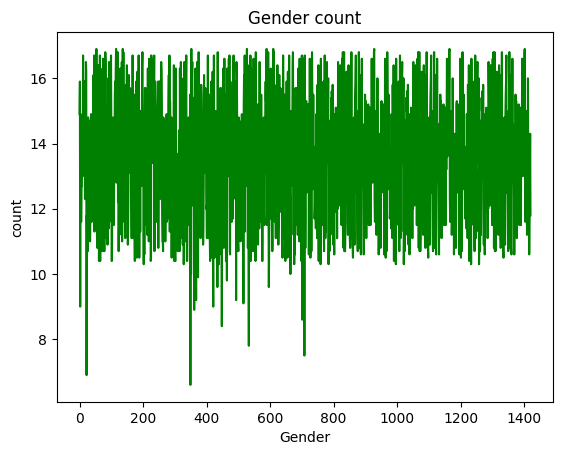

In [10]:
output=df['Hemoglobin']
output.plot(kind='line',color=["green"])
plt.xlabel("Gender")
plt.ylabel("count")
plt.title("Gender count")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13068\2742929963.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df['Gender'], y=df['Hemoglobin'], hue='Result', data=df, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13068\2742929963.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


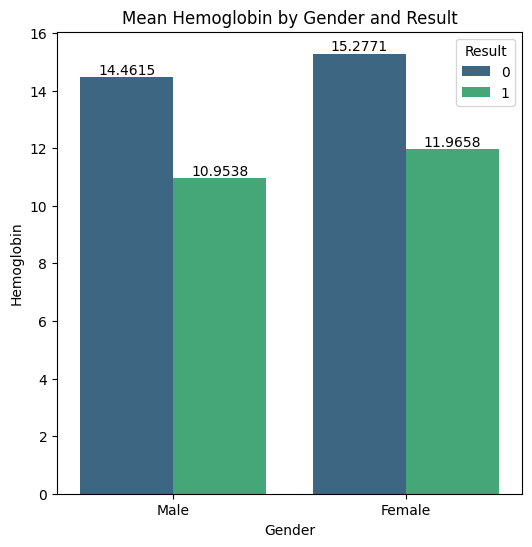

In [11]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=df['Gender'], y=df['Hemoglobin'], hue='Result', data=df, ci=None, palette='viridis')

# Set x-axis labels if 0 = Male, 1 = Female
ax.set_xticklabels(['Male', 'Female'])

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container)

# Add title
plt.title("Mean Hemoglobin by Gender and Result")

# Show the plot
plt.show()

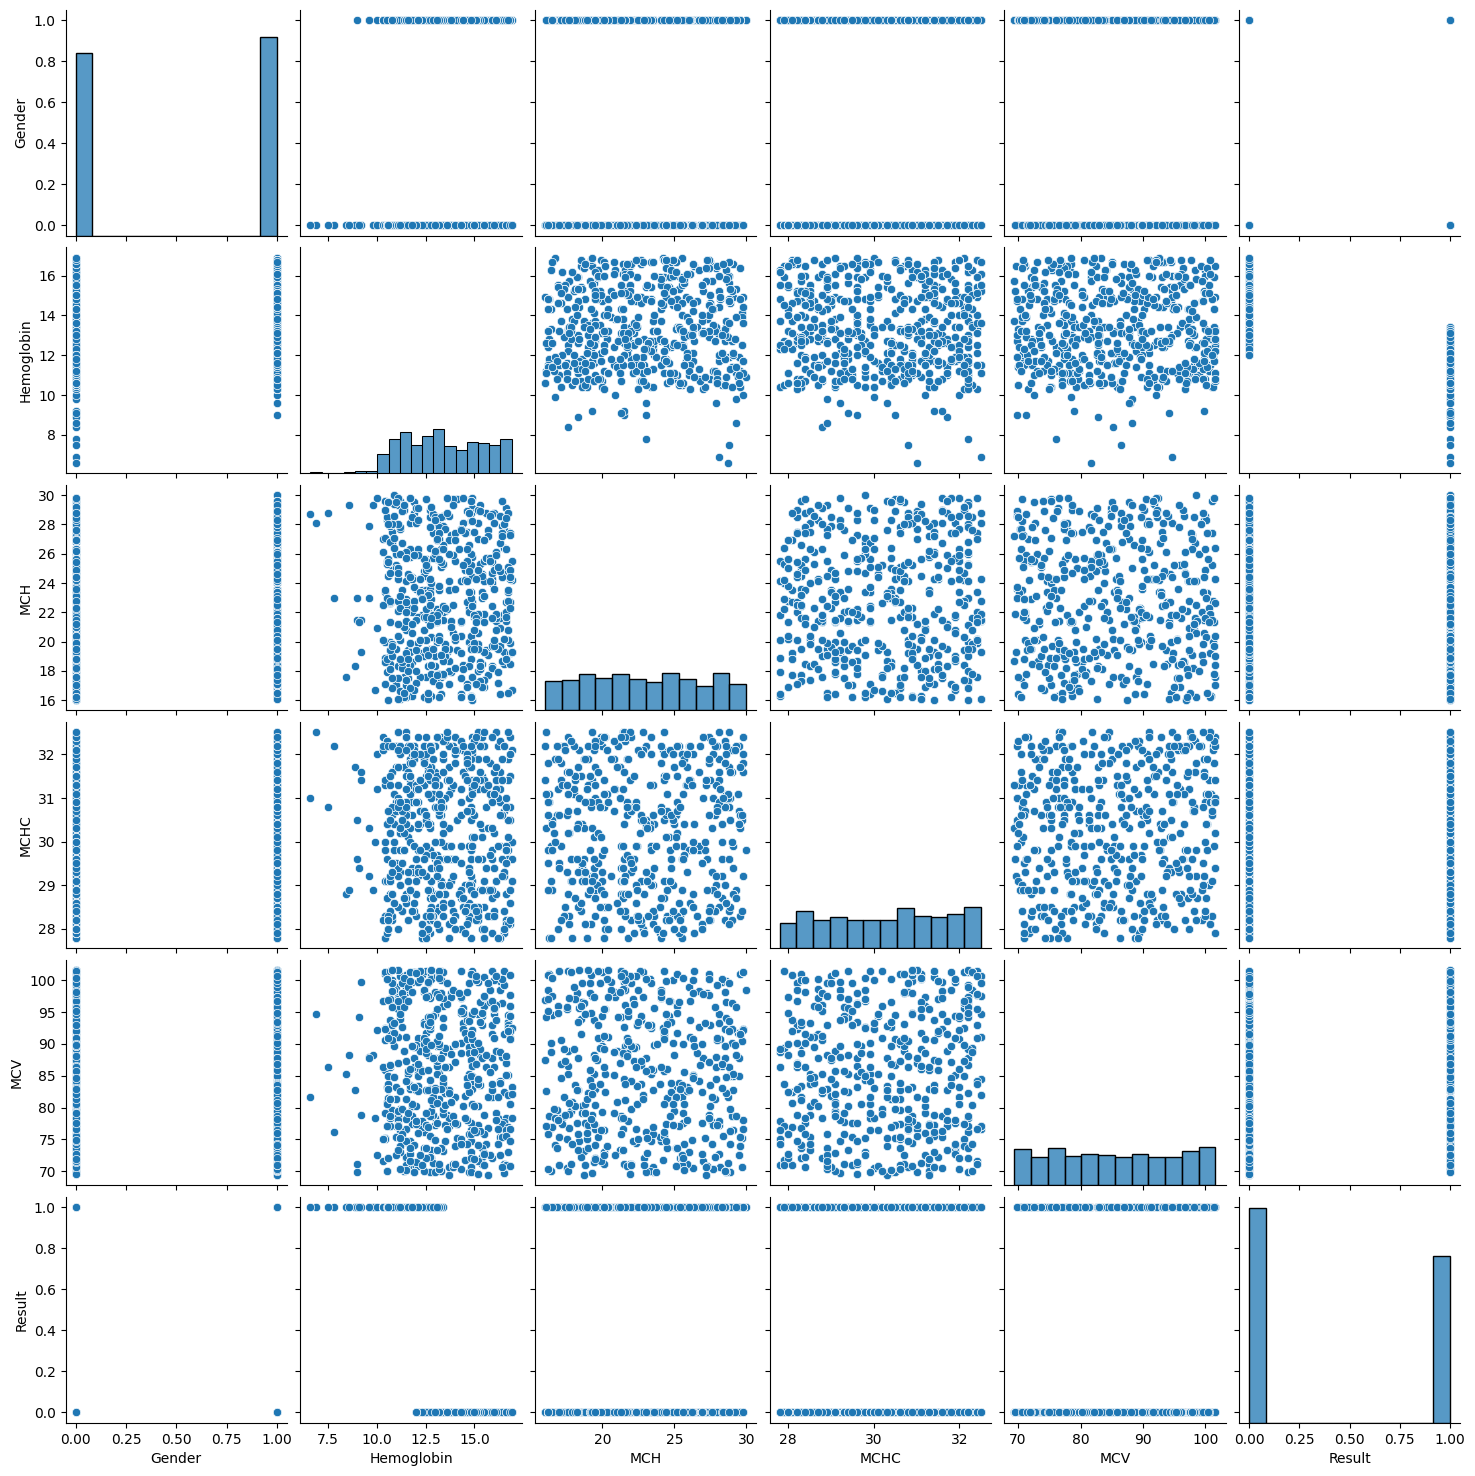

In [12]:
sns.pairplot(df)

In [13]:
co=df.corr()

<Axes: >

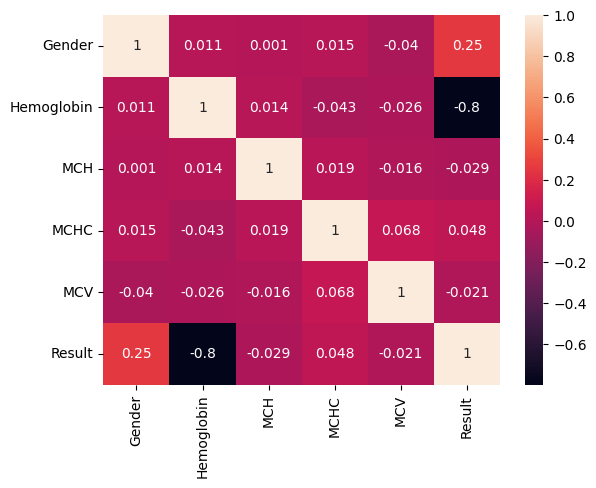

In [14]:
sns.heatmap(co,annot=True)

In [15]:
X=df.drop("Result", axis=1)

In [16]:
X


,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [17]:
Y=df["Result"]

In [18]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=20,test_size=.2)

In [21]:
X_train.shape



(1136, 5)

In [22]:
X_test.shape


(285, 5)

In [23]:
y_train.shape


(1136,)

In [24]:
y_test.shape

(285,)

Model Development

Decision Tree Model 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create and train Decision Tree model
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)  # You can change hyperparameters
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       167
           1       0.80      1.00      0.89       118

    accuracy                           0.89       285
   macro avg       0.90      0.91      0.89       285
weighted avg       0.92      0.89      0.90       285



Logistic Regression Model

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create and train Logistic Regression model
model_lr = LogisticRegression(solver='liblinear',max_iter=200) 
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       167
           1       0.96      0.95      0.95       118

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285



Random forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train Random Forest model
model_rd = RandomForestClassifier(n_estimators=50, max_depth=2,random_state=42)
model_rd.fit(X_train, y_train)

# Make predictions
y_pred = model_rd.predict(X_test)

# Evaluate the model
accuracy_rd = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rd:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       167
           1       0.86      1.00      0.93       118

    accuracy                           0.93       285
   macro avg       0.93      0.94      0.93       285
weighted avg       0.94      0.93      0.93       285



Support Vector Machine model

In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create and train SVM model
model_svm = SVC(kernel='rbf', C=1.0)  # You can change kernel to 'rbf', 'poly', or 'sigmoid'
model_svm.fit(X_train, y_train)

# Make predictions
y_pred = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       167
           1       0.84      0.94      0.89       118

    accuracy                           0.90       285
   macro avg       0.90      0.91      0.90       285
weighted avg       0.91      0.90      0.90       285



Gaussian Navies Bayes Model

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train Gaussian Naïve Bayes model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# Make predictions
y_pred = model_gnb.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gnb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       167
           1       0.90      0.96      0.93       118

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



Gradient Boosting Classifier  Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train Gradient Boosting model
model_gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions
y_pred = model_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       167
           1       0.86      1.00      0.93       118

    accuracy                           0.93       285
   macro avg       0.93      0.94      0.93       285
weighted avg       0.94      0.93      0.93       285



Collective Study of above Model 

In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',max_iter=200),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=2,random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0),
    "Naïve Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-score (Class 1)": report["1"]["f1-score"]
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")

from tabulate import tabulate
print(tabulate(results_df, headers='keys',tablefmt='pretty'))




Model Performance Comparison:

+---+------------------------+--------------------+---------------------+--------------------+--------------------+
|   |         Model          |      Accuracy      | Precision (Class 1) |  Recall (Class 1)  | F1-score (Class 1) |
+---+------------------------+--------------------+---------------------+--------------------+--------------------+
| 0 |  Logistic Regression   | 0.9614035087719298 | 0.9572649572649573  | 0.9491525423728814 | 0.9531914893617022 |
| 1 |     Decision Tree      | 0.8947368421052632 | 0.7972972972972973  |        1.0         | 0.8872180451127819 |
| 2 |     Random Forest      | 0.9333333333333333 | 0.8613138686131386  |        1.0         | 0.9254901960784313 |
| 3 | Support Vector Machine | 0.9017543859649123 | 0.8409090909090909  | 0.940677966101695  |       0.888        |
| 4 |      Naïve Bayes       | 0.9403508771929825 |        0.904        | 0.9576271186440678 | 0.9300411522633746 |
| 5 |   Gradient Boosting    | 0.9333333

Cross validaion of models

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',max_iter=200),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=2,random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0),
    "Naïve Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=42)
}

# Define cross-validation method (k-fold = 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
results = []
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')  # You can change scoring metric
    results.append({"Model": name, "Mean Accuracy": scores.mean(), "Std Dev": scores.std()})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nCross-Validation Results:\n")
print(results_df)



Cross-Validation Results:

                    Model  Mean Accuracy   Std Dev
0     Logistic Regression       0.950756  0.012693
1           Decision Tree       0.890941  0.014069
2           Random Forest       0.950047  0.025006
3  Support Vector Machine       0.903608  0.018984
4             Naïve Bayes       0.935980  0.015379
5       Gradient Boosting       0.945819  0.026391


Testing of Model by Logistic Regression

In [36]:
model_lr.predict([[0,14.9,16.0,31.4,87.5]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Model Import (Logistic Regression)

In [42]:
import pickle
pickle.dump(model_lr,open("model","wb"))